#### Problem-3

Consider reformulating linear regression as a generative model, so we have $x=g_\phi(y)$. *What is the new loss function?* Find an expression for the inverse function $y = g^{-1}_{\phi}(x)$ that we would use to perform **inference**. Will this model make the same predictions as the **discriminative** version for a given training dataset $\{x_i, y_i\}$ ? One way to establish this is to write code that fits a line to three data points both methods and see if the result is the same.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

create data samples


In [24]:
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])

##### 1.discriminative models

$$
y = f_\phi(x) = \phi_0 + \phi_1 x
$$

we use the least square solution to determine the parameters.

$$
\begin{aligned}
\phi_0 &=\mathbf {\bar y} - \phi_1 \mathbf {\bar x} \\
\phi_1 &= \frac{\sum_{i=1}^N (x_iy_i - \mathbf {\bar y}x_i)}{\sum_{i=1}^N (x_i^2 - \mathbf {\bar x}x_i)}
\end{aligned} 
$$




In [25]:
def discriminative_model(x, y):
    N = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x ** 2)
    phi_1 = (sum_xy - (sum_y / N) * sum_x) / (sum_x_squared - (sum_x / N) * sum_x)
    phi_0 = (sum_y / N) - phi_1 * (sum_x / N)
    return {"phi_0" : phi_0, "phi_1": phi_1}

##### 2. Generative models
$$
x = g_\phi(y) = \phi_0 + \phi_1 * y
$$

we through maximize the likelihood or minimize the negative likelihood to solve the problem.

In [26]:
def generative_model(x, y):
        N = len(x)
        sum_x = np.sum(x)
        sum_y = np.sum(y)
        sum_xy = np.sum(x * y)
        sum_x_squared = np.sum(x ** 2)
        phi_1 = (sum_xy - (sum_y / N) * sum_x) / (sum_x_squared - (sum_x / N) * sum_x)
        phi_0 = (sum_y / N) - phi_1 * (sum_x / N)
        return {"phi_0" : phi_0, "phi_1": phi_1}


In [27]:
phi_discri = discriminative_model(x, y)
phi_generate = generative_model(y, x)

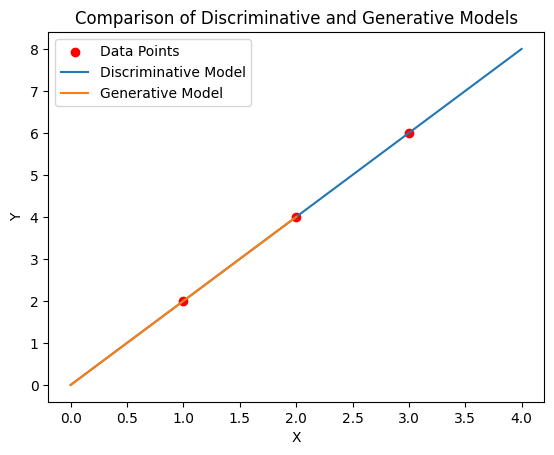

In [30]:
plt.scatter(x, y, color='red', label='Data Points')
x_vals = np.array([0, 4])
plt.plot(x_vals, phi_discri['phi_1']*x_vals + phi_discri['phi_0'], label='Discriminative Model')
plt.plot((phi_generate['phi_0'], phi_generate['phi_0'] + 4*phi_generate['phi_1']), (0, 4), label='Generative Model')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Discriminative and Generative Models')
plt.savefig('./problem_3.png')
# plt.show()